En aquest quadern implementarem una xarxa neuronal simple per reconèixer digits, usant l'API de Keras.

Està bastat en el capítol 5 del llibre de Jordi Torres **Python Deep Learning**.

# 1. Precàrrega de les dades

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


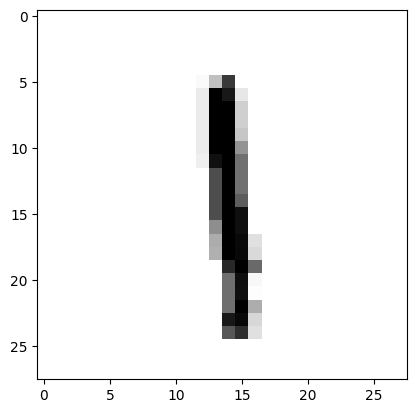

In [2]:
import matplotlib.pyplot as plt
plt.imshow(x_train[8], cmap=plt.cm.binary)

In [3]:
print(y_train[8])

1


In [4]:
print(x_train.ndim)

3


In [5]:
print(x_train.shape)

(60000, 28, 28)


In [6]:
print(x_train.dtype)

uint8


In [7]:
my_slice = x_train[1:100:,:]
print(my_slice.shape)

(99, 28, 28)


In [8]:
my_slice = x_train[1:100, 0:28, 0:28]

In [9]:
my_slice = x_train[:, 14:, 14:]
print(my_slice.shape)

(60000, 14, 14)


In [10]:
my_slice = x_train[:, 7:-7, 7:-7]
print(my_slice.shape)

(60000, 14, 14)


# 2. Preprocessament de dades d'entrada a una xarxa neuronal

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255

In [12]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000,784)

In [13]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
print (y_test[0])

7


In [16]:
print(y_train[0])

5


In [17]:
print(y_train.shape)

(60000,)


In [18]:
print(x_test.shape)

(10000, 784)


In [19]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [20]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [21]:
print(y_train.shape)

(60000, 10)


In [22]:
print(y_test.shape)

(10000, 10)


# 3. Definició del model

In [23]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10,activation='sigmoid',input_shape=(784,)))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

/Users/carlos/Development/IEDIB_CEIA_2024-25/Sistemas de Aprendizaje automatico/Bloque 5/notes_code/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

# 4. Configuració de l'aprenentatge

In [25]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# 5. Entrenament del model

In [26]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 333us/step - accuracy: 0.3432 - loss: 2.0913
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 314us/step - accuracy: 0.7264 - loss: 1.4027
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 313us/step - accuracy: 0.8013 - loss: 1.0078
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 314us/step - accuracy: 0.8397 - loss: 0.7886
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 313us/step - accuracy: 0.8595 - loss: 0.6665


# 6. Avaluació del model

In [27]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.8591 - loss: 0.6365


# 7. Generació de prediccions


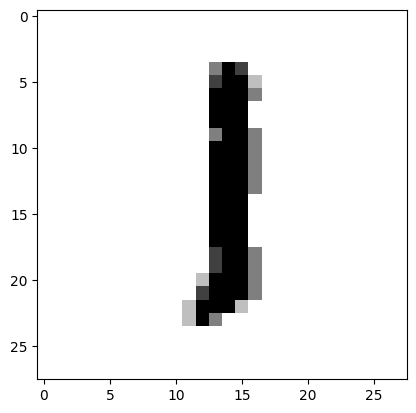

In [28]:
plt.imshow(x_test[14].reshape((28,28)), cmap=plt.cm.binary)

In [29]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step


In [30]:
predictions[14]

array([0.00179012, 0.8654248 , 0.01946504, 0.04391018, 0.00149716,
       0.00933062, 0.0041222 , 0.02581836, 0.02148783, 0.0071537 ],
      dtype=float32)

In [31]:
import numpy as np
np.argmax(predictions[14])

np.int64(1)